In [2]:
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('./pykan_gaussian/train.csv')
test_data = pd.read_csv('./pykan_gaussian/test.csv')

In [4]:
label_encoder = LabelEncoder()
for col in ['Name', 'Sex', 'Ticket']:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [5]:
train_data.fillna(train_data.select_dtypes(include=[np.number]).mean(), inplace=True)
test_data.fillna(test_data.select_dtypes(include=[np.number]).mean(), inplace=True)

In [6]:
train_df = train_data.drop(['PassengerId', 'Survived', 'Age', 'Cabin', 'Embarked'], axis=1)
target_df = train_data['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
train_input = torch.tensor(X_train_scaled, dtype=torch.float32)
train_label = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [10]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

In [11]:
from kan import KAN, create_dataset

In [12]:
input_dim = train_input.shape[1]  # Number of input features
output_dim = 1  # Binary classification (Survived)
model = KAN(width=[input_dim, 3, output_dim], grid=3, k=2, seed=0) 

In [21]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.001, lamb_entropy=1., lr=0.01, lamb_l1=0.1, lamb_coef = 0.01, lamb_coefdiff = 0.01)

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.20e-01 | test loss: 4.13e-01 | reg: 5.56e+00 :   5%|▏  | 1/20 [00:00<00:09,  2.05it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.90e-01 | test loss: 4.05e-01 | reg: 5.72e+00 :  10%|▎  | 2/20 [00:00<00:07,  2.32it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.76e-01 | test loss: 4.04e-01 | reg: 5.70e+00 :  15%|▍  | 3/20 [00:01<00:06,  2.44it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.69e-01 | test loss: 4.13e-01 | reg: 5.67e+00 :  20%|▌  | 4/20 [00:01<00:06,  2.45it/s]

x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: 3.66e-01 | test loss: 4.12e-01 | reg: 5.66e+00 :  25%|▊  | 5/20 [00:02<00:06,  2.45it/s]

x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.65e-01 | test loss: 4.15e-01 | reg: 5.48e+00 :  30%|▉  | 6/20 [00:02<00:05,  2.51it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.64e-01 | test loss: 4.16e-01 | reg: 5.48e+00 :  35%|█  | 7/20 [00:02<00:05,  2.45it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.63e-01 | test loss: 4.14e-01 | reg: 5.48e+00 :  40%|█▏ | 8/20 [00:03<00:04,  2.52it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.63e-01 | test loss: 4.14e-01 | reg: 5.49e+00 :  45%|█▎ | 9/20 [00:03<00:04,  2.54it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: 3.62e-01 | test loss: 4.09e-01 | reg: 5.49e+00 :  50%|█ | 10/20 [00:04<00:03,  2.60it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.63e-01 | test loss: 4.17e-01 | reg: 5.50e+00 :  55%|█ | 11/20 [00:04<00:03,  2.60it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.62e-01 | test loss: 4.09e-01 | reg: 5.51e+00 :  60%|█▏| 12/20 [00:04<00:03,  2.63it/s]

x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: 3.61e-01 | test loss: 4.06e-01 | reg: 5.49e+00 :  65%|█▎| 13/20 [00:05<00:02,  2.68it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: 3.61e-01 | test loss: 4.06e-01 | reg: 5.49e+00 :  70%|█▍| 14/20 [00:05<00:02,  2.68it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.60e-01 | test loss: 4.04e-01 | reg: 5.49e+00 :  75%|█▌| 15/20 [00:05<00:01,  2.57it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.61e-01 | test loss: 4.02e-01 | reg: 5.51e+00 :  80%|█▌| 16/20 [00:06<00:01,  2.44it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.60e-01 | test loss: 4.02e-01 | reg: 5.51e+00 :  85%|█▋| 17/20 [00:06<00:01,  2.51it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.59e-01 | test loss: 3.97e-01 | reg: 5.51e+00 :  90%|█▊| 18/20 [00:07<00:00,  2.56it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 3.58e-01 | test loss: 3.97e-01 | reg: 5.52e+00 :  95%|█▉| 19/20 [00:07<00:00,  2.52it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: 3.57e-01 | test loss: 3.97e-01 | reg: 5.53e+00 : 100%|██| 20/20 [00:07<00:00,  2.52it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

{'train_loss': [array(0.41985857, dtype=float32),
  array(0.38967893, dtype=float32),
  array(0.37589005, dtype=float32),
  array(0.3693661, dtype=float32),
  array(0.36558887, dtype=float32),
  array(0.36470014, dtype=float32),
  array(0.3639851, dtype=float32),
  array(0.36330438, dtype=float32),
  array(0.36257437, dtype=float32),
  array(0.36185542, dtype=float32),
  array(0.36309096, dtype=float32),
  array(0.36179155, dtype=float32),
  array(0.36126363, dtype=float32),
  array(0.36091873, dtype=float32),
  array(0.3604404, dtype=float32),
  array(0.36092487, dtype=float32),
  array(0.36000124, dtype=float32),
  array(0.3586791, dtype=float32),
  array(0.35759827, dtype=float32),
  array(0.3571593, dtype=float32)],
 'test_loss': [array(0.41335797, dtype=float32),
  array(0.4050021, dtype=float32),
  array(0.40371743, dtype=float32),
  array(0.4134157, dtype=float32),
  array(0.41212857, dtype=float32),
  array(0.41464126, dtype=float32),
  array(0.41608647, dtype=float32),
  array

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])


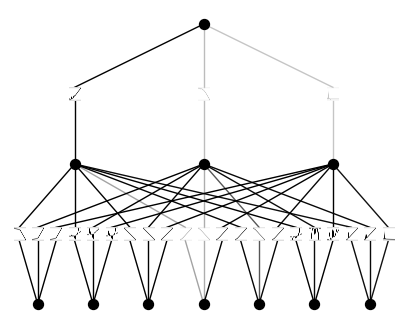

In [14]:
model(dataset['train_input'])
model.plot(beta=100)

train loss: 4.76e-01 | test loss: 4.79e-01 | reg: 4.55e+01 :   6%|▏  | 3/50 [00:00<00:01, 27.92it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.76e-01 | test loss: 4.79e-01 | reg: 4.43e+01 :  22%|▍ | 11/50 [00:00<00:01, 35.69it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.76e-01 | test loss: 4.79e-01 | reg: 4.33e+01 :  42%|▊ | 21/50 [00:00<00:00, 37.83it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.75e-01 | test loss: 4.80e-01 | reg: 4.19e+01 :  52%|█ | 26/50 [00:00<00:00, 38.26it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.74e-01 | test loss: 4.80e-01 | reg: 4.07e+01 :  70%|█▍| 35/50 [00:01<00:00, 38.62it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: 4.73e-01 | test loss: 4.80e-01 | reg: 4.00e+01 :  86%|█▋| 43/50 [00:01<00:00, 38.35it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.72e-01 | test loss: 4.80e-01 | reg: 4.00e+01 : 100%|██| 50/50 [00:01<00:00, 37.03it/s]


x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

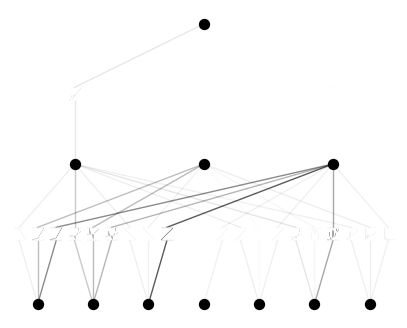

In [15]:
model.train(dataset, opt="Adam", steps=50, lr=0.001, lamb=0.01, lamb_entropy=10.)
model.plot()

In [17]:
model.prune()
model.plot(mask=True)
model = model.prune()
model(dataset['train_input'])
model.plot()

RuntimeError: shape '[3, 7, 4]' is invalid for input of size 28

train loss: 4.78e-01 | test loss: 4.85e-01 | reg: 4.96e+00 :   8%|▏  | 4/50 [00:00<00:01, 36.29it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.76e-01 | test loss: 4.83e-01 | reg: 4.96e+00 :  24%|▍ | 12/50 [00:00<00:01, 29.31it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.74e-01 | test loss: 4.81e-01 | reg: 4.94e+00 :  32%|▋ | 16/50 [00:00<00:01, 32.75it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.71e-01 | test loss: 4.79e-01 | reg: 4.98e+00 :  52%|█ | 26/50 [00:00<00:00, 35.91it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.69e-01 | test loss: 4.78e-01 | reg: 5.00e+00 :  72%|█▍| 36/50 [00:01<00:00, 37.23it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.67e-01 | test loss: 4.77e-01 | reg: 5.03e+00 :  82%|█▋| 41/50 [00:01<00:00, 37.42it/s]

x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.66e-01 | test loss: 4.76e-01 | reg: 5.04e+00 :  92%|█▊| 46/50 [00:01<00:00, 36.84it/s]

x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: 4.66e-01 | test loss: 4.76e-01 | reg: 5.04e+00 : 100%|██| 50/50 [00:01<00:00, 34.45it/s]


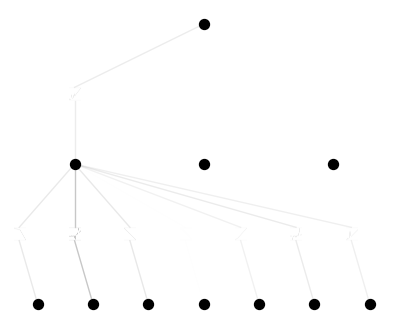

In [18]:
model.train(dataset, opt="Adam", steps=50, lr=0.001)
model.plot()

In [19]:
mode = "auto"  # Use automatic mode for setting symbolic functions
if mode == "manual":
    model.fix_symbolic(0,0,0,'sin')
    model.fix_symbolic(0,1,0,'x^2')
    model.fix_symbolic(1,0,0,'exp')
elif mode == "auto":
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^2, r2=1.0000007152557373
fixing (0,0,1) with abs, r2=0.0
fixing (0,0,2) with abs, r2=0.0
fixing (0,1,0) with tanh, r2=0.822300374507904
fixing (0,1,1) with abs, r2=0.0
fixing (0,1,2) with abs, r2=0.0
fixing (0,2,0) with x^3, r2=1.000001072883606
fixing (0,2,1) with abs, r2=0.0
fixing (0,2,2) with abs, r2=0.0
fixing (0,3,0) with sin, r2=0.9996017813682556
fixing (0,3,1) with abs, r2=0.0
fixing (0,3,2) with abs, r2=0.0
fixing (0,4,0) with abs, r2=0.9998747110366821
fixing (0,4,1) with abs, r2=0.0
fixing (0,4,2) with abs, r2=0.0
fixing (0,5,0) with tanh, r2=0.48202943801879883
fixing (0,5,1) with abs, r2=0.0
fixing (0,5,2) with abs, r2=0.0
fixing (0,6,0) with tanh, r2=0.8002679347991943
fixing (0,6,1) with abs, r2=0.0
fixing (0,6,2) with abs, r2=0.0
fixing (1,0,0) with sqrt, r2=0.5292671322822571
fixing (1,1,0) with abs, r2=0.0
fixing (1,2,0) with abs, r2=0.0


In [20]:
model.train(dataset, opt="LBFGS", steps=50, lr=0.001)
symbolic_formula = model.symbolic_formula()[0][0]
print(symbolic_formula)

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: nan | test loss: nan | reg: nan :   2%|▎                 | 1/50 [00:00<00:22,  2.17it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 179])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 179])
x_eval shape: torch.Size([3, 179])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 179])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: nan | test loss: nan | reg: nan :   4%|▋                 | 2/50 [00:00<00:22,  2.16it/s]

x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: t

train loss: nan | test loss: nan | reg: nan :   6%|█                 | 3/50 [00:01<00:20,  2.25it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: nan | test loss: nan | reg: nan :   8%|█▍                | 4/50 [00:01<00:21,  2.18it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

train loss: nan | test loss: nan | reg: nan :  10%|█▊                | 5/50 [00:02<00:20,  2.20it/s]

x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 712])
x_eval shape: torch.Size([3, 712])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 712])
x_eval shape: torch.Size([21, 712])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: to

RuntimeError: false INTERNAL ASSERT FAILED at "../aten/src/ATen/native/BatchLinearAlgebra.cpp":1539, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.

In [22]:
test_df = test_data.drop(['PassengerId', 'Age', 'Cabin', 'Embarked'], axis=1)
test_df_scaled = scaler.transform(test_df)
test_input = torch.tensor(test_df_scaled, dtype=torch.float32)

In [23]:
assert not torch.isnan(test_input).any(), "NaNs found in test_input"

In [24]:
y_pred_sub = model(test_input).detach().numpy()

x_eval shape: torch.Size([21, 418])
coef shape: torch.Size([21, 3])
mu shape: torch.Size([21, 3])
sigma shape: torch.Size([21, 3])
gaussians shape: torch.Size([21, 3, 418])
x_eval shape: torch.Size([3, 418])
coef shape: torch.Size([3, 3])
mu shape: torch.Size([3, 3])
sigma shape: torch.Size([3, 3])
gaussians shape: torch.Size([3, 3, 418])


In [25]:
threshold = 0.5
y_pred_sub = (y_pred_sub >= threshold).astype(int).flatten()

In [26]:
sub = pd.DataFrame()
sub['PassengerId'] = test_data['PassengerId']
sub['Survived'] = y_pred_sub

In [27]:
print(sub.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
